In [12]:
""" Classification Homework for Python for Machine Learning
    Data source: https://archive.ics.uci.edu/ml/datasets/Dota2+Games+Results
    Warren Watts 12/7/2018
"""

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Function to read csv file
def read_file(filename):
    line_count = 0
    file_open = open(filename,"r")
    data_array = []
    for line in iter(file_open):
        line1 = line.rstrip()
        line_split=line1.split(",")
        del line_split[2:4]
        for i in range(len(line_split)):
            line_split[i] = int(line_split[i])
        data_array.append(line_split)
    file_open.close()
    return data_array

# function to get hero names for hero columns
def read_heroes(filename="heroes.json"):
    heroes = open(filename, "r")
    hero_dict = {}
    name = None
    for line in iter(heroes):
        line1 = line.strip()
        line2 = line1.strip(',')
        if line2.startswith('"name":'):
            name = line2[8:].strip('"')
        if line2.startswith('"id":'):
            hero_dict[int(line2[6:])] = name
    return hero_dict

In [3]:
# read in data and column names
dota = read_file("dota2Train.csv")
print(dota[:2])
print(len(dota[0]))
hero_map = read_heroes()
print(hero_map)

[[-1, 223, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 152, 0, 0, 0, 1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
115
{1: 'antimage', 2: 'axe', 3: 'bane', 4: 'bloodseeker', 5: 'crystal_maiden', 6: 'drow_ranger', 7: 'earthshaker', 8: 'juggernaut', 9: 'mirana', 11: 'nevermore', 10: 'morphling', 12: 'phantom_lancer', 13: 'puck', 14: 'pudge', 15: 'razor', 16: 'sand_king', 17: 'storm_spirit', 18: 'sven', 1

In [4]:
dota_header = ["result", "cluster"]
for i in range(113):
    dota_header.append(hero_map.get(i+1, "unknown"))
dota_df = pd.DataFrame(dota,columns=dota_header)
print(dota_df.iloc[:10,:20])
print(dota_df.iloc[:10,20:40])
print(dota_df.iloc[:10,40:60])
print(dota_df.iloc[:10,60:80])
print(dota_df.iloc[:10,80:100])
print(dota_df.iloc[:10,100:])


   result  cluster  antimage  axe  bane  bloodseeker  crystal_maiden  \
0      -1      223         0    0     0            0               0   
1       1      152         0    0     0            1               0   
2       1      131         0    0     0            1               0   
3       1      154         0    0     0            0               0   
4      -1      171         0    0     0            0               0   
5       1      122         0    1     0            0               0   
6       1      224         0    0     0            0               0   
7      -1      227         0   -1     0            0               0   
8      -1      111         0    0     1            0               0   
9      -1      151         0    0     0            1               0   

   drow_ranger  earthshaker  juggernaut  mirana  morphling  nevermore  \
0            0            0           0       0          1          0   
1           -1            0           0       0          0   

In [5]:
print(dota_df.iloc[:,:20].describe())
print(dota_df.iloc[:,20:40].describe())
print(dota_df.iloc[:,40:60].describe())
print(dota_df.iloc[:,60:80].describe())
print(dota_df.iloc[:,80:100].describe())
print(dota_df.iloc[:,100:].describe())

             result       cluster      antimage           axe          bane  \
count  92650.000000  92650.000000  92650.000000  92650.000000  92650.000000   
mean       0.053038    175.864145     -0.001630     -0.000971      0.000691   
std        0.998598     35.658214      0.402004      0.467672      0.165052   
min       -1.000000    111.000000     -1.000000     -1.000000     -1.000000   
25%       -1.000000    152.000000      0.000000      0.000000      0.000000   
50%        1.000000    156.000000      0.000000      0.000000      0.000000   
75%        1.000000    223.000000      0.000000      0.000000      0.000000   
max        1.000000    261.000000      1.000000      1.000000      1.000000   

        bloodseeker  crystal_maiden   drow_ranger   earthshaker    juggernaut  \
count  92650.000000    92650.000000  92650.000000  92650.000000  92650.000000   
mean      -0.000799       -0.002008      0.003173     -0.000345     -0.003832   
std        0.355393        0.329348      0.48

            huskar  night_stalker   broodmother  bounty_hunter        weaver  \
count  92650.00000   92650.000000  92650.000000   92650.000000  92650.000000   
mean       0.00014       0.000378     -0.000043       0.000486     -0.000324   
std        0.37034       0.218097      0.145448       0.370486      0.291896   
min       -1.00000      -1.000000     -1.000000      -1.000000     -1.000000   
25%        0.00000       0.000000      0.000000       0.000000      0.000000   
50%        0.00000       0.000000      0.000000       0.000000      0.000000   
75%        0.00000       0.000000      0.000000       0.000000      0.000000   
max        1.00000       1.000000      1.000000       1.000000      1.000000   

             jakiro      batrider          chen       spectre  \
count  92650.000000  92650.000000  92650.000000  92650.000000   
mean      -0.000237     -0.000205      0.000324     -0.001371   
std        0.195967      0.200836      0.092340      0.286424   
min       -1.000000

In [6]:
# drop columns with mean = 0 and std dev = 0
dota_df.drop(['unknown', 'abyssal_underlord'], axis=1)

# Convert dota data to numpy array
dataset = np.array(dota_df)
X = dataset[:,2:]
y = dataset[:,0]

## Is PCA useful for this data set?

In [8]:
# create covariant matrix
covariant_matrix = np.cov(X.T)
# print(covariant_matrix)
# get eigen values/vectors
eigen_values,eigen_vectors = np.linalg.eig(covariant_matrix)
print(eigen_vectors)

[[ 5.17479913e-03 -2.65927808e-02  1.34068786e-02 ... -4.51325983e-04
   0.00000000e+00  0.00000000e+00]
 [ 6.14789834e-03 -2.10658264e-02 -4.47276329e-02 ...  5.39400924e-03
   0.00000000e+00  0.00000000e+00]
 [ 1.84302989e-04 -1.68939157e-03  3.40521922e-04 ... -7.47088809e-04
   0.00000000e+00  0.00000000e+00]
 ...
 [-2.50186571e-03 -3.92515601e-04 -1.56421290e-03 ...  4.99826760e-03
   0.00000000e+00  0.00000000e+00]
 [-1.34102940e-03  8.73849298e-04 -8.40637899e-04 ...  9.01530915e-04
   0.00000000e+00  0.00000000e+00]
 [-1.56405051e-03 -6.85263487e-05 -1.26831866e-03 ... -1.89985368e-03
   0.00000000e+00  0.00000000e+00]]


113
[0.03545865125777838, 0.03335969808533817, 0.03113997445253142, 0.029275878133316054, 0.02689553708377154, 0.025535585737053154, 0.023515172298042345, 0.02282274023137654, 0.022299613773335, 0.021274095381370938, 0.019129127192350777, 0.018894329770286378, 0.01842202910113147, 0.017609284506388802, 0.015964982490761247, 0.015604873401104759, 0.013994427252863538, 0.013719336311056719, 0.013706510676503749, 0.013447733836460229, 0.013300855681182827, 0.013061386858465071, 0.012778426723067159, 0.012539057882378368, 0.01227963288669031, 0.012115986997770929, 0.012020941806911887, 0.01168711400592924, 0.011520814379652598, 0.01128202915124077, 0.011156598696600498, 0.010960710921948169, 0.010803670940182804, 0.01053481546753139, 0.010476593826706918, 0.009975390058722985, 0.009609129315792268, 0.009065542377480246, 0.008891496491911045, 0.008834265401171005, 0.008535781915418185, 0.008479361212358478, 0.00841844434797057, 0.008366027977511627, 0.00817493827600497, 0.008140638551796961

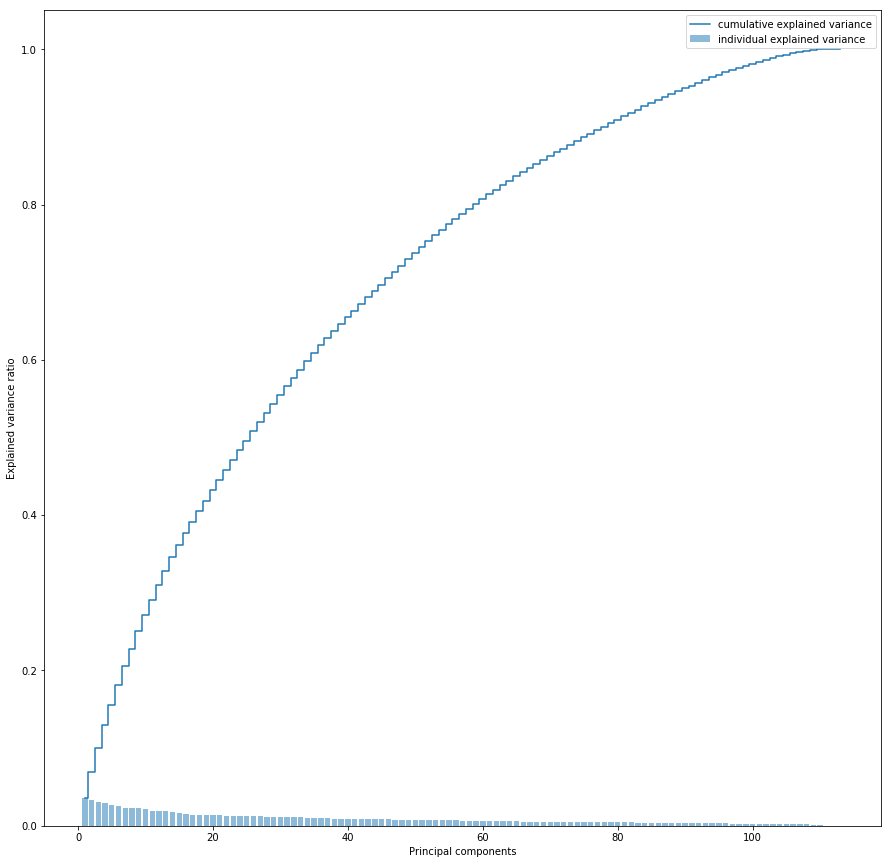

In [11]:
tot = sum(eigen_values)
var_exp = [(i/tot) for i in sorted(eigen_values,reverse=True)]
print(len(var_exp))
print(var_exp)
cum_var_exp = np.cumsum(var_exp)

fig = plt.figure(figsize = (15,15))
plt.bar(range(1,114),var_exp,alpha=0.5,align='center',
         label='individual explained variance')
plt.step(range(1,114),cum_var_exp,where='mid',
    label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

## PCA not very effective for this data set.

## Clustering with the DOTA data set
Are certain teams more prevalent?

In [17]:
wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    print(i,kmeans.inertia_)

1 926476.4139233672
2 906652.8346123121
3 892005.8027552014
4 879767.5486386684
5 870602.229212296
6 862767.804689068
7 856485.5644084722
8 850470.6273294629
9 846476.2407200543
10 840514.2451486947
11 837889.6778491181
12 833655.1632915728
13 831327.5721112483
14 829422.8537832672
15 826299.4351152668
16 823318.1433395384
17 822504.5899783066
18 819469.484666815
19 818294.726088329
20 816743.0191539327
21 814995.0958888411
22 813492.3827595846
23 811890.0141308848
24 810355.4315244656
25 809650.1259632229
26 807970.934333113
27 806938.2054562215
28 805546.274668374
29 803993.2508160078
30 803280.2808491391
31 802648.6021198798
32 801481.4338252005
33 799905.7707034413
34 799473.9619799837
35 798139.8074861515
36 797337.7459870195
37 796212.2529294598
38 795093.8489050099
39 794962.6843952371
40 793244.2821023563
41 792651.1158353471
42 791545.3499649568
43 790906.4822816917
44 790249.2617444666
45 789708.7451283482
46 788459.4908021842
47 787972.7787027652
48 787457.2904793452
49 7865

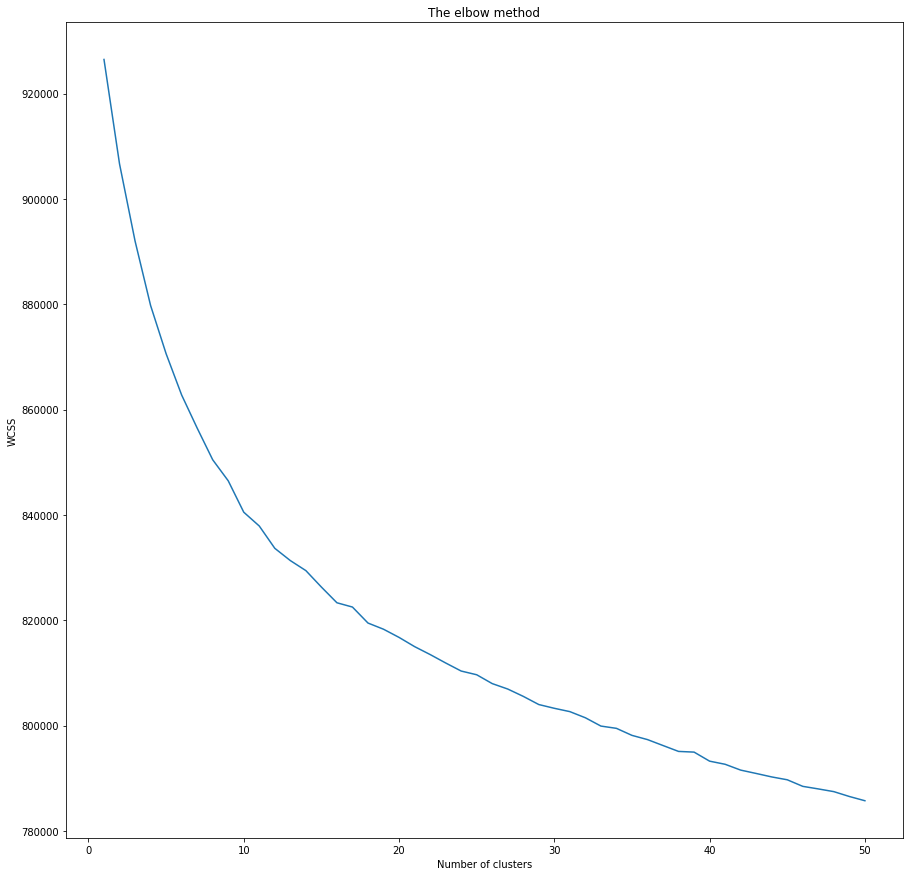

In [18]:
1#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.figure(figsize = (15,15))
plt.plot(range(1, 21), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

### Difficult to spot the exact elbow on this one, but calling it at 10.

In [19]:
# best_n_clusters = 10
kmeans = KMeans(n_clusters = 10, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [53]:
cluster_labels = kmeans.labels_
# see if clusters have any distinguishing features.
hero_names = dota_df.columns.values[2:]
cluster_team = {}
cluster_total = []
cluster_wins = []
for label in np.unique(cluster_labels):
    cluster_team[label] = [{},{}]
    cluster_total.append(0)
    cluster_wins.append(0)


for i, label in enumerate(cluster_labels):
    for j, value in enumerate(X[i]):
        if value == 1:
            cluster_team[label][0][hero_names[j]] = cluster_team[label][0].get(hero_names[j], 0) + 1
        elif value == -1:
             cluster_team[label][1][hero_names[j]] = cluster_team[label][1].get(hero_names[j], 0) + 1
    cluster_total[label] += 1
    if y[i] == 1:
        cluster_wins[label] += 1

for i,v in sorted(cluster_team.items()):
    print("Cluster:", i)
    print("Team 1 win/loss: " + str(cluster_wins[i]) + "/" + str(cluster_total[i]-cluster_wins[i]))
    print()
    print("Top 20 Heros Team 1:")
    count = 1
    for j,u in sorted(v[0].items(), key = lambda x: x[1], reverse = True):
        print(str(count)+ ". " +j + ": " + str(u), end = " ")
        if count % 5 == 0:
            print()
        count += 1
        if count > 20:
            break
    print()
    print("Top 20 Heros Team 2:")
    count = 1
    for j,u in sorted(v[1].items(), key = lambda x: x[1], reverse = True):
        print(str(count)+ ". " +j + ": " + str(u), end = " ")
        if count % 5 == 0:
            print()
        count += 1
        if count > 20:
            break
    print()
    print()

Cluster: 0
Team 1 win/loss: 9519/8621

Top 20 Heros Team 1:
1. drow_ranger: 2464 2. axe: 2193 3. riki: 2116 4. faceless_void: 2011 5. sven: 1978 
6. invoker: 1950 7. sniper: 1859 8. antimage: 1814 9. shredder: 1771 10. windrunner: 1536 
11. huskar: 1490 12. life_stealer: 1450 13. skeleton_king: 1431 14. alchemist: 1425 15. bounty_hunter: 1403 
16. bloodseeker: 1347 17. storm_spirit: 1329 18. ursa: 1323 19. sand_king: 1299 20. slardar: 1272 

Top 20 Heros Team 2:
1. legion_commander: 2874 2. slark: 2565 3. juggernaut: 2503 4. axe: 1960 5. drow_ranger: 1938 
6. riki: 1931 7. invoker: 1907 8. sniper: 1697 9. sven: 1691 10. faceless_void: 1661 
11. shredder: 1659 12. antimage: 1517 13. windrunner: 1442 14. bounty_hunter: 1322 15. huskar: 1299 
16. alchemist: 1280 17. life_stealer: 1244 18. skeleton_king: 1242 19. storm_spirit: 1229 20. lion: 1228 


Cluster: 1
Team 1 win/loss: 3685/3095

Top 20 Heros Team 1:
1. juggernaut: 6780 2. mirana: 1834 3. pudge: 1223 4. invoker: 654 5. axe: 647 
6.

### Clusters don't predict team win/loss target, team make up doesn't seem to predict win or loss for team

In [7]:
# Logistic Regression
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X,y)
print(model)
# make predictions
expected = y
predicted = model.predict(X)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
cm = metrics.confusion_matrix(expected, predicted)
# print(model.intercept_)
# print(model.coef_)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
             precision    recall  f1-score   support

         -1       0.59      0.51      0.55     43868
          1       0.61      0.68      0.64     48782

avg / total       0.60      0.60      0.60     92650

[[22534 21334]
 [15651 33131]]


In [8]:
def plot_cm(cm):   
    result = ["lose","win"]
    df_cm = pd.DataFrame(cm, index=result, columns=result)
    fig = plt.figure(figsize=(5,5))
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d",cmap="YlGnBu",linecolor="blue",linewidths=1.0)
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=10)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

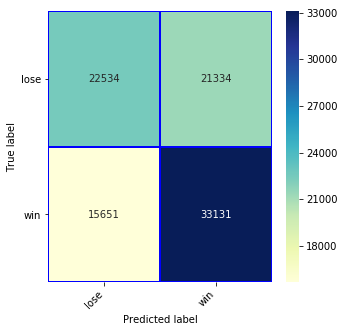

In [9]:
plot_cm(cm)

In [10]:
## Naive Bayes Classification
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X,y)
print(model)
# make predictions
expected = y
predicted = model.predict(X)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
cm = metrics.confusion_matrix(expected, predicted)

GaussianNB(priors=None)
             precision    recall  f1-score   support

         -1       0.55      0.52      0.54     43868
          1       0.59      0.62      0.60     48782

avg / total       0.57      0.57      0.57     92650

[[22962 20906]
 [18660 30122]]


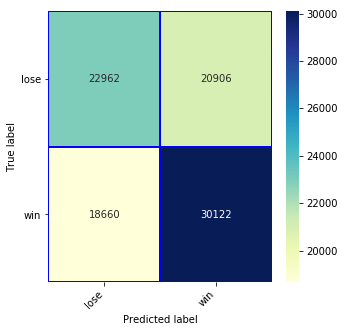

In [93]:
plot_cm(cm)

In [13]:
# Knn- classification 
# data set to large and sparse for knn.
# k-Nearest Neighbor Classification
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X,y)
print(model)
# make predictions
expected = y
predicted = model.predict(X)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
cm = metrics.confusion_matrix(expected, predicted)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

         -1       0.70      0.67      0.68     43868
          1       0.71      0.74      0.73     48782

avg / total       0.70      0.70      0.70     92650

[[29225 14643]
 [12716 36066]]


In [ ]:
plot_cm(cm)

In [11]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X,y)
print(model)
# make predictions
expected = y
predicted = model.predict(X)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
cm = metrics.confusion_matrix(expected, predicted)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
             precision    recall  f1-score   support

         -1       1.00      1.00      1.00     43868
          1       1.00      1.00      1.00     48782

avg / total       1.00      1.00      1.00     92650

[[43868     0]
 [    0 48782]]


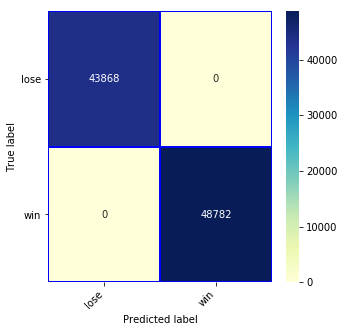

In [12]:
plot_cm(cm)